# Worksheet 6 - Data analysis task 3

- This worksheet should be used in conjunction with the Intro to Python course notes [here](https://uniexeterrse.github.io/intro-to-python/). 
- All information contained in this worksheet can be found in the course notes. 
- This worksheet highlights tasks that can be completed during the sessions.

## 1. Processing multiple files

It is common to have multiple files that have been generated during a data collection, survey, or experiment. We can use the `glob` module to analyse these in one go.

In [120]:
import glob

In [121]:
print(glob.glob('data/inflammation*.csv'))

['data/inflammation-05.csv', 'data/inflammation-11.csv', 'data/inflammation-10.csv', 'data/inflammation-04.csv', 'data/inflammation-12.csv', 'data/inflammation-06.csv', 'data/inflammation-07.csv', 'data/inflammation-03.csv', 'data/inflammation-02.csv', 'data/inflammation-01.csv', 'data/inflammation-09.csv', 'data/inflammation-08.csv']


In [122]:
print(sorted(glob.glob('data/inflammation*.csv')))

['data/inflammation-01.csv', 'data/inflammation-02.csv', 'data/inflammation-03.csv', 'data/inflammation-04.csv', 'data/inflammation-05.csv', 'data/inflammation-06.csv', 'data/inflammation-07.csv', 'data/inflammation-08.csv', 'data/inflammation-09.csv', 'data/inflammation-10.csv', 'data/inflammation-11.csv', 'data/inflammation-12.csv']


In [123]:
for filename in sorted(glob.glob('data/inflammation*.csv')):
    data = np.loadtxt(fname=filename, delimiter=',')
    print(data.shape)

(60, 40)
(60, 40)
(60, 40)
(60, 40)
(60, 40)
(60, 40)
(60, 40)
(60, 40)
(60, 40)
(60, 40)
(60, 40)
(60, 40)


data/inflammation-01.csv


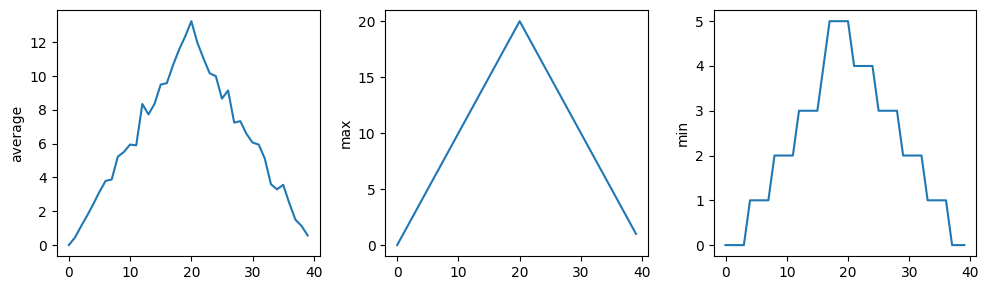

data/inflammation-02.csv


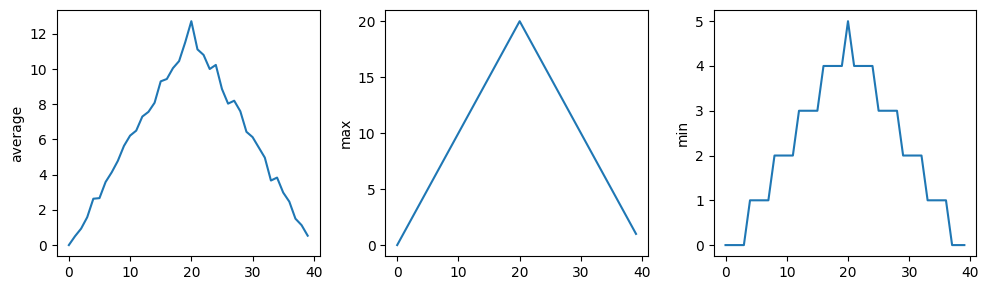

data/inflammation-03.csv


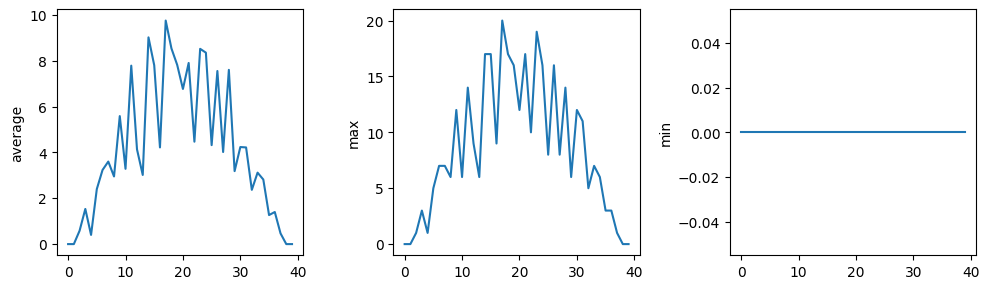

In [124]:
import glob
import numpy as np
import matplotlib.pyplot as plt

filenames = sorted(glob.glob('data/inflammation*.csv'))
filenames = filenames[0:3]
for filename in filenames:
    print(filename)

    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(np.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(np.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(np.min(data, axis=0))

    fig.tight_layout()
    plt.show()

The plots generated for the second clinical trial file look very similar to the plots for the first file: their average plots show similar “noisy” rises and falls; their maxima plots show exactly the same linear rise and fall; and their minima plots show similar staircase structures.

Here is a list of warning signs for our data:

* The linear rise and fall of the maxima plots.
* The stepped value of our minima plots.
* The minimum value for each day of the trial in dataset 3 is 0.

## 2. Investigation into maxima 

In [125]:
filenames = sorted(glob.glob('data/inflammation*.csv'))
for filename in filenames:
    data = np.loadtxt(fname=filename, delimiter=',')
    print(f"{filename}: Max number of flare-ups of max value patient: {np.max(np.max(data, axis=0))}")

data/inflammation-01.csv: Max number of flare-ups of max value patient: 20.0
data/inflammation-02.csv: Max number of flare-ups of max value patient: 20.0
data/inflammation-03.csv: Max number of flare-ups of max value patient: 20.0
data/inflammation-04.csv: Max number of flare-ups of max value patient: 20.0
data/inflammation-05.csv: Max number of flare-ups of max value patient: 20.0
data/inflammation-06.csv: Max number of flare-ups of max value patient: 20.0
data/inflammation-07.csv: Max number of flare-ups of max value patient: 20.0
data/inflammation-08.csv: Max number of flare-ups of max value patient: 20.0
data/inflammation-09.csv: Max number of flare-ups of max value patient: 20.0
data/inflammation-10.csv: Max number of flare-ups of max value patient: 20.0
data/inflammation-11.csv: Max number of flare-ups of max value patient: 20.0
data/inflammation-12.csv: Max number of flare-ups of max value patient: 20.0


If each row is a patient, and each column is the number of flare ups during the clinical trial, is it likely that the maximum number of flare ups for each trial dataset is the same?

## 3. Investigation in to day 3

The third dataset shows much noisier average and maxima plots that are far less suspicious than the first two datasets, however the minima plot shows that the third dataset minima is consistently zero across every day of the trial. If we produce a heat map for the third data file we see the following

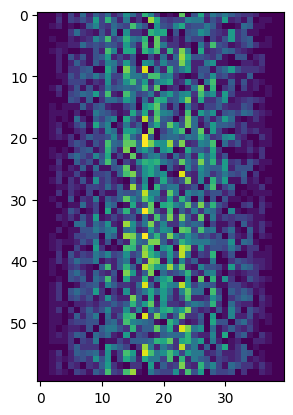

In [126]:
day_3_data = np.loadtxt('data/inflammation-03.csv', delimiter=',')
plt.imshow(day_3_data);

In [127]:
day_3_data.shape

(60, 40)

In [128]:
for i in day_3_data[59, :]:
    if i != 0:
        print("Element not equal to 0")

In [129]:
day_3_data[59, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

We can see that there are zero values sporadically distributed across all patients and days of the clinical trial, suggesting that there were potential issues with data collection throughout the trial. In addition, we can see that the last patient in the study didn’t have any inflammation flare-ups at all throughout the trial, suggesting that they may not even suffer from arthritis!

## 3. Exercise - Plotting differences

**Exercise**: Plot the difference between the average inflammations reported in the first and second datasets (stored in `inflammation-01.csv` and `inflammation-02.csv`, correspondingly), i.e., the difference between the leftmost plots of the first two figures.

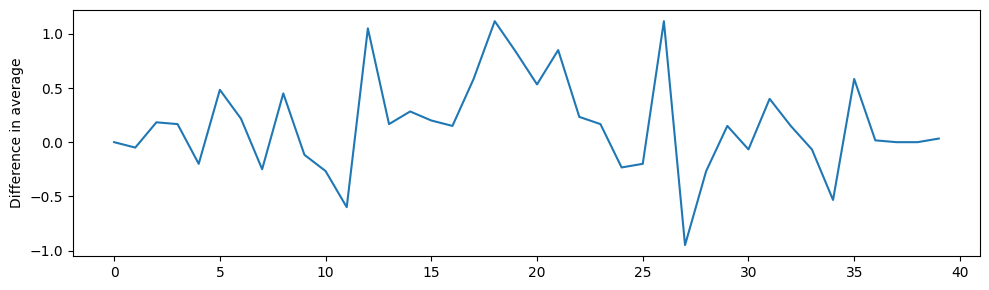

In [130]:
# Answer here

import glob
import numpy as np
import matplotlib.pyplot as plt

filenames = sorted(glob.glob('data/inflammation*.csv'))

data0 = np.loadtxt(fname=filenames[0], delimiter=',')
data1 = np.loadtxt(fname=filenames[1], delimiter=',')

fig = plt.figure(figsize=(10.0, 3.0))

plt.ylabel('Difference in average')
plt.plot(np.mean(data0, axis=0) - np.mean(data1, axis=0))

fig.tight_layout()
plt.show()

Lets have a look to see if any of the datasets are identical:

In [131]:
filenames = sorted(glob.glob('data/inflammation*.csv'))

collated_data = {}
for filename in filenames:
    data_array = np.loadtxt(fname=filename, delimiter=',')
    data = data_array.tolist()
    collated_data[filename] = data

unique_datasets, unique_filenames = [], []
for filename, dataset in collated_data.items():
    if dataset not in unique_datasets:
        unique_datasets.append(dataset)
        unique_filenames.append(filename)
    else:
        for index, unique_dataset in enumerate(unique_datasets):
             if unique_dataset == dataset:
                print(f"Warning: {unique_filenames[index]} and {filename} are identical")

It looks like 3 of the datasets are exactly identical. This is highly unlikely for clinical trial data. Lets plot the differences on a line graph and check for sure.

In [132]:
filenames_to_check = ["data/inflammation-03.csv", "data/inflammation-08.csv", "data/inflammation-11.csv"]

# generate some non repeating pairs using the itertools module
from itertools import combinations

pairs_to_check = []
for comb in combinations(filenames_to_check, 2):
    pairs_to_check.append(comb)

for pair in pairs_to_check:
    print(pair)

('data/inflammation-03.csv', 'data/inflammation-08.csv')
('data/inflammation-03.csv', 'data/inflammation-11.csv')
('data/inflammation-08.csv', 'data/inflammation-11.csv')


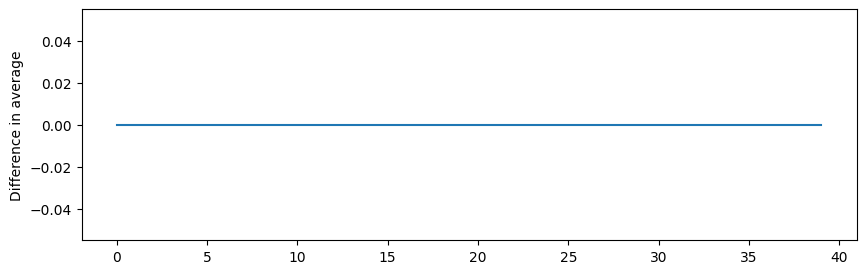

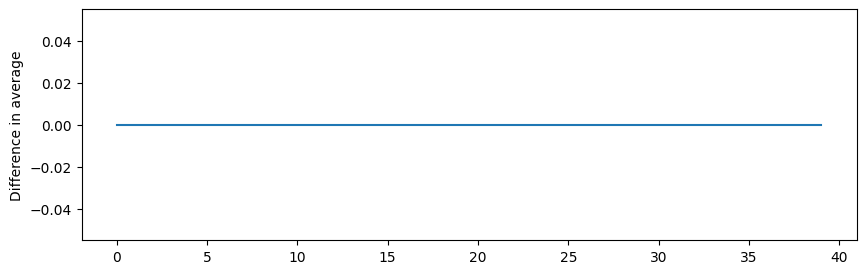

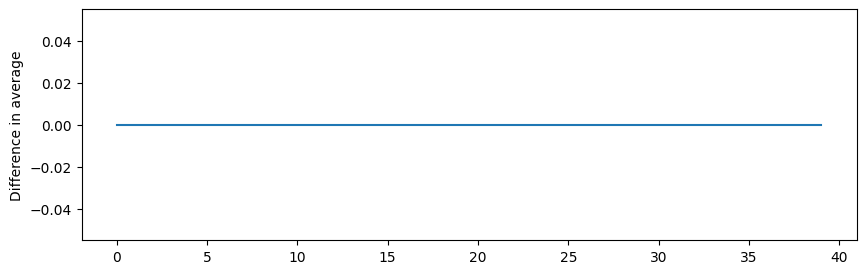

In [133]:
for pair in pairs_to_check:
    filename_1, filename_2 = pair[0], pair[1]

    data_1 = np.loadtxt(fname=filename_1, delimiter=',')
    data_2 = np.loadtxt(fname=filename_2, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))
    fig.tight_layout()
    plt.plot(np.mean(data_1, axis=0) - np.mean(data_2, axis=0))
    plt.ylabel('Difference in average')
    
    plt.show()

These datasets look identical.

## 4. Exercise - Generate composite statistics

**Exercise**: Use each of the files once to generate a dataset containing values averaged over all patients:

In [134]:
filenames = glob.glob('data/inflammation*.csv')
composite_data = np.zeros((60,40))
for filename in filenames:
    # sum each new file's data into composite_data as it's read
    #
# and then divide the composite_data by number of samples
composite_data = composite_data / len(filenames)

IndentationError: expected an indented block after 'for' statement on line 3 (1499117752.py, line 7)

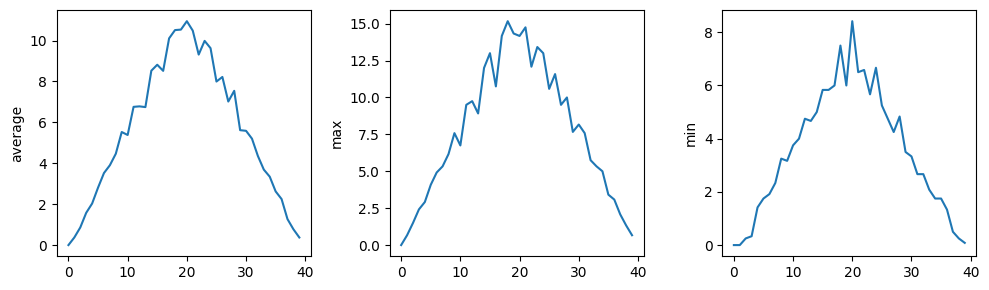

In [135]:
# Answer here

import glob
import numpy as np
import matplotlib.pyplot as plt

filenames = glob.glob('data/inflammation*.csv')
composite_data = np.zeros((60,40))

for filename in filenames:
    data = np.loadtxt(fname = filename, delimiter=',')
    composite_data = composite_data + data

composite_data = composite_data / len(filenames)

fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(composite_data, axis=0))

axes2.set_ylabel('max')
axes2.plot(np.max(composite_data, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.min(composite_data, axis=0))

fig.tight_layout()

plt.show()

## 5. Conclusions

After spending some time investigating the heat map and statistical plots, as well as doing the above exercises to plot differences between datasets and to generate composite patient statistics, we gain some insight into the twelve clinical trial datasets.

The datasets appear to fall into two categories:

* seemingly “ideal” datasets that agree excellently with Dr. Maverick’s claims, but display suspicious maxima and minima (such as `inflammation-01.csv` and `inflammation-02.csv`)
* “noisy” datasets that somewhat agree with Dr. Maverick’s claims, but show concerning data collection issues such as sporadic missing values and even an unsuitable candidate making it into the clinical trial.
* it appears that all three of the “noisy” datasets (`inflammation-03.csv`, `inflammation-08.csv`, and `inflammation-11.csv`) are identical down to the last value. 

Armed with this information, we confront Dr. Maverick about the suspicious data and duplicated files. Dr. Maverick confesses that they fabricated the clinical data after they found out that the initial trial suffered from a number of issues, including unreliable data-recording and poor participant selection. They created fake data to prove their drug worked, and when we asked for more data they tried to generate more fake datasets, as well as throwing in the original poor-quality dataset a few times to try and make all the trials seem a bit more “realistic”.

Congratulations! We’ve investigated the inflammation data and proven that the datasets have been synthetically generated.

But it would be a shame to throw away the synthetic datasets that have taught us so much already, so we’ll forgive the imaginary Dr. Maverick and continue to use the data to learn how to program.